# Final Report

Transplant the necessary code from `eda.ipynb` to this notebook, and clean everything up for presentation!

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
nypd = pd.read_csv('data/NYPD_Complaint_Data_2018.csv')

In [63]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# 1: Introduction & Hypotheses

## Introduction
This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) in 2018.

## <font color='red'>Data Dictionary -- HERE</font>

## Hypotheses
1. More crimes occur during the warmer months of the year.
- Criminal activity is more common during times of the day when there are more people around or active, i.e. commute times, meal times. Criminal activity is also more likely to occur when suspects believe they won’t be seen or caught, i.e. late night.
- Each borough of NYC has roughly the same volume of complaints as other boroughs, when comparing per capita.
- Criminal activity in NYC aligns with known correlations of [criminal behavior](https://en.wikipedia.org/wiki/Statistical_correlations_of_criminal_behaviour#Gender_and_biology) **
- Racial bias may exist, with victims having a tendency to file complaints against specific races.


** Crime occurs most frequently during the second and third decades of life. Males commit more crime overall and more violent crime than females. They commit more property crime except shoplifting, which is about equally distributed between the genders.

# 2: Data Cleanup & Preparation

#### Check for and handle null values

In [64]:
print(nypd.shape)
nypd.isnull().sum()

(466295, 15)


CMPLNT_NUM                0
CMPLNT_FR_DT              0
CMPLNT_FR_TM              0
OFNS_DESC                14
LAW_CAT_CD                0
BORO_NM                 312
PREM_TYP_DESC          1992
JURIS_DESC                0
SUSP_AGE_GROUP       119399
SUSP_RACE            119399
SUSP_SEX             119399
VIC_AGE_GROUP             0
VIC_RACE                  0
VIC_SEX                   0
CMPLNT_FR_DT_YEAR         0
dtype: int64

In [65]:
nypd_ofns_nulls_dropped = nypd.dropna(subset=['OFNS_DESC'], inplace=True)

In [66]:
nypd.fillna(value={'BORO_NM': 'UNKNOWN'}, inplace=True)
nypd.fillna(value={'SUSP_AGE_GROUP': 'UNKNOWN', 'SUSP_RACE': 'UNKNOWN'}, inplace=True)
nypd.fillna(value={'SUSP_SEX': 'U'}, inplace=True)

#### Handle invalid values 

In [67]:
nypd["SUSP_AGE_GROUP"].replace({
    "954": "UNKNOWN",
    "924": "UNKNOWN",
    "2018": "UNKNOWN",
    "955": "UNKNOWN",
    "952": "UNKNOWN",
    "920": "UNKNOWN",
    "1018": "UNKNOWN",
    "922": "UNKNOWN",
    "928": "UNKNOWN",
    "-2": "UNKNOWN",
    "-63": "UNKNOWN",
    "1012": "UNKNOWN",
    "1017": "UNKNOWN",
    "-974": "UNKNOWN",
    "-939": "UNKNOWN",
    "-978": "UNKNOWN",
    "-941": "UNKNOWN",
    "938": "UNKNOWN",
    "1967": "UNKNOWN",
    "-80": "UNKNOWN",
    "948": "UNKNOWN"},
    inplace=True)

In [68]:
nypd["VIC_AGE_GROUP"].replace({
    "-955": "UNKNOWN",
    "-76": "UNKNOWN",
    "-958": "UNKNOWN",
    "-970": "UNKNOWN",
    "-962": "UNKNOWN",
    "-67": "UNKNOWN",
    "953": "UNKNOWN",
    "929": "UNKNOWN",
    "-2": "UNKNOWN",
    "965": "UNKNOWN",
    "922": "UNKNOWN",
    "-956": "UNKNOWN",
    "948": "UNKNOWN",
    "-61": "UNKNOWN",
    "936": "UNKNOWN",
    "-972": "UNKNOWN",
    "-43": "UNKNOWN",
    "-968": "UNKNOWN",
    "-940": "UNKNOWN",
    "-4": "UNKNOWN",
    "-952": "UNKNOWN",
    "-3": "UNKNOWN",
    "-974": "UNKNOWN",
    "970": "UNKNOWN",
    "1017": "UNKNOWN",
    "954": "UNKNOWN",
    "-51": "UNKNOWN",
    "-55": "UNKNOWN",
    "951": "UNKNOWN",
    "-966": "UNKNOWN",
    "-1": "UNKNOWN",
    "957": "UNKNOWN",
    "-59": "UNKNOWN",
    "-948": "UNKNOWN",
    "-5": "UNKNOWN"},
    inplace=True)

#### Create new columns

In [69]:
nypd['CMPLNT_FR'] = nypd['CMPLNT_FR'] = nypd['CMPLNT_FR_DT'] + ' ' + nypd['CMPLNT_FR_TM']
nypd['CMPLNT_FR'] = pd.to_datetime(nypd['CMPLNT_FR'])

In [70]:
nypd['CMPLNT_FR_MONTH'] = nypd['CMPLNT_FR'].dt.month
nypd['CMPLNT_FR_DAY_OF_WEEK'] = nypd['CMPLNT_FR'].dt.dayofweek
nypd['CMPLNT_FR_HOUR'] = nypd['CMPLNT_FR'].dt.hour
nypd['CMPLNT_FR_DATE'] = nypd['CMPLNT_FR'].dt.date

#### Drop unneeded columns

In [71]:
columns_to_delete = ['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_FR_DT_YEAR']
nypd.drop(columns_to_delete, inplace=True, axis=1)

# 3-4: Analyze and Interpret the Data

### Time-based trends

In [72]:
complaints_by_month = nypd['CMPLNT_FR_MONTH'].value_counts().sort_index()

In [73]:
nypd['CMPLNT_FR_MONTH'].value_counts().sort_values(ascending=False)

7     41990
8     41669
5     41297
6     40048
10    39614
9     39423
12    37979
1     37696
4     37617
3     37507
11    36752
2     34689
Name: CMPLNT_FR_MONTH, dtype: int64

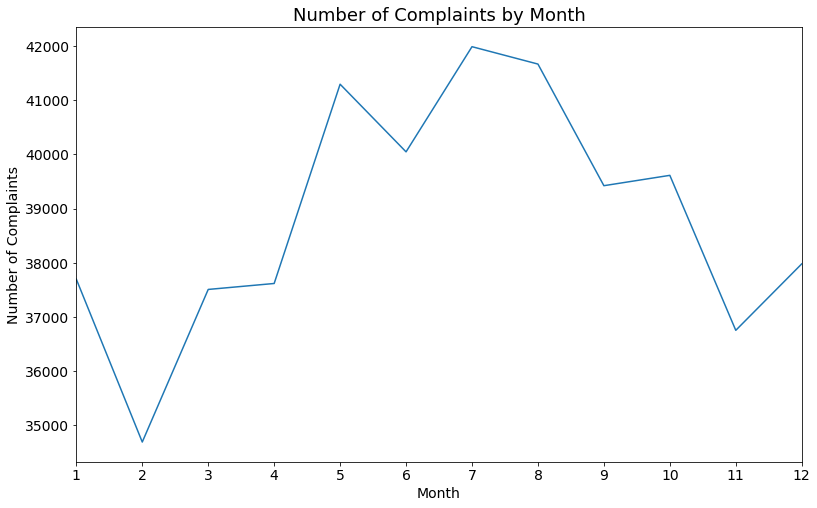

In [102]:
complaints_by_month.plot(figsize=(13,8), fontsize=14, xticks=complaints_by_month.index)
plt.ylabel('Number of Complaints', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.title('Number of Complaints by Month', fontsize=18);

### Observation #1:
### More criminal activity happens during the warmer months of the year: late spring and summertime. Months with the highest number of complaints include May, June, July, and August.

In [75]:
complaints_by_hour = nypd['CMPLNT_FR_HOUR'].value_counts().sort_index()

In [76]:
nypd['CMPLNT_FR_HOUR'].value_counts().sort_values(ascending=False)

17    27935
18    27674
15    27565
16    27498
12    27460
19    25690
20    24957
14    24930
0     23164
13    22300
21    21886
22    20667
11    19742
10    19246
23    18496
9     18318
8     16855
1     14734
2     12331
7     10800
3     10572
4      9164
6      7469
5      6828
Name: CMPLNT_FR_HOUR, dtype: int64

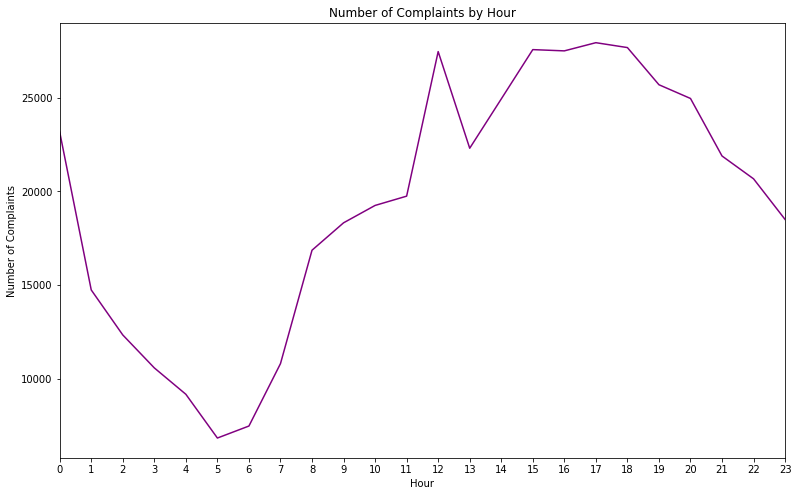

In [77]:
complaints_by_hour.plot(figsize=(13,8), color='purple', xticks=complaints_by_hour.index)
plt.ylabel('Number of Complaints')
plt.xlabel('Hour')
plt.title('Number of Complaints by Hour');

### Observation #2:
### Times when we see the most number of complaints are within the hours of 5pm, 6pm, 3pm, 4pm, and 12pm

In [78]:
complaints_by_dayofweek_hour = nypd.groupby(['CMPLNT_FR_DAY_OF_WEEK',\
                                             'CMPLNT_FR_HOUR']).CMPLNT_NUM.count()

In [79]:
complaints_by_dayofweek_hour = complaints_by_dayofweek_hour.unstack().transpose()

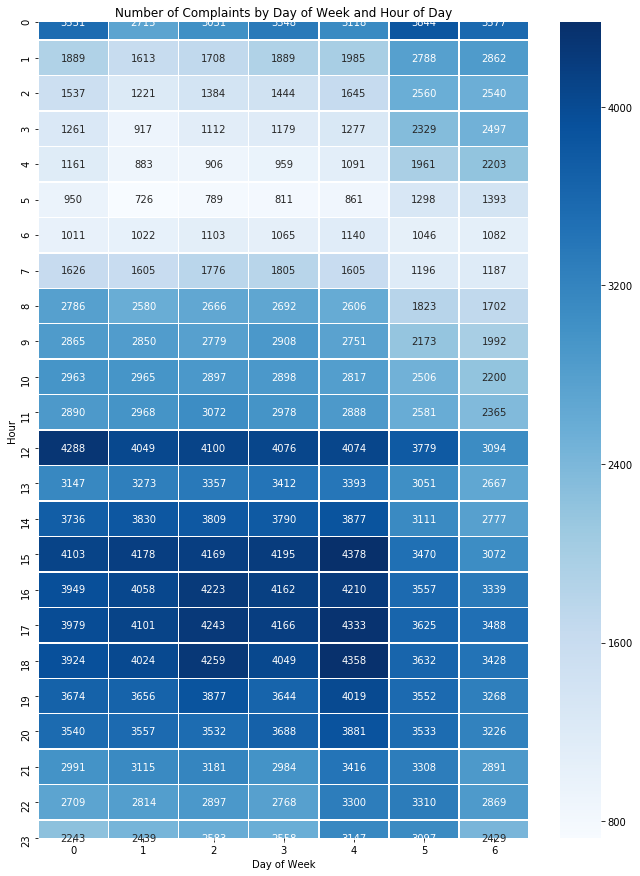

In [80]:
plt.figure(figsize=(11,15))
ax = sns.heatmap(complaints_by_dayofweek_hour, annot=True, fmt="d", linewidths=.5, cmap = 'Blues');
ax.axes.set_title("Number of Complaints by Day of Week and Hour of Day", y=1.01)
ax.set(xlabel='Day of Week', ylabel='Hour');

### Observation #3:
### Noon, 3pm-7pm have the most criminal activity across all days of the week. Midnight on weekends also sees much activity.

### Borough-level similarities & differences

In [81]:
[nypd_boro_known[nypd_boro_known['BORO_NM'] == 'BRONX'].OFNS_DESC.value_counts(dropna=False).head(10)]

[HARRASSMENT 2                     16269
 PETIT LARCENY                     15446
 ASSAULT 3 & RELATED OFFENSES      14385
 CRIMINAL MISCHIEF & RELATED OF    10690
 GRAND LARCENY                      6449
 FELONY ASSAULT                     5861
 DANGEROUS DRUGS                    5269
 OFF. AGNST PUB ORD SENSBLTY &      4556
 ROBBERY                            3215
 OFFENSES AGAINST PUBLIC ADMINI     2615
 Name: OFNS_DESC, dtype: int64]

In [82]:
nypd_boro_known = nypd[nypd['BORO_NM'] != 'UNKNOWN']
nypd_all_boro = pd.DataFrame(nypd_boro_known.\
                             OFNS_DESC.value_counts(dropna=False).head(5))
nypd_brooklyn = pd.DataFrame(nypd_boro_known[nypd_boro_known['BORO_NM'] == 'BROOKLYN'].\
                             OFNS_DESC.value_counts(dropna=False).head(5))
nypd_manhattan = pd.DataFrame(nypd_boro_known[nypd_boro_known['BORO_NM'] == 'MANHATTAN'].\
                             OFNS_DESC.value_counts(dropna=False).head(5))
nypd_bronx = pd.DataFrame(nypd_boro_known[nypd_boro_known['BORO_NM'] == 'BRONX'].\
                          OFNS_DESC.value_counts(dropna=False).head(5))
nypd_queens = pd.DataFrame(nypd_boro_known[nypd_boro_known['BORO_NM'] == 'QUEENS'].\
                             OFNS_DESC.value_counts(dropna=False).head(5))
nypd_staten_island = pd.DataFrame(nypd_boro_known[nypd_boro_known['BORO_NM'] == 'STATEN ISLAND'].\
                             OFNS_DESC.value_counts(dropna=False).head(5))

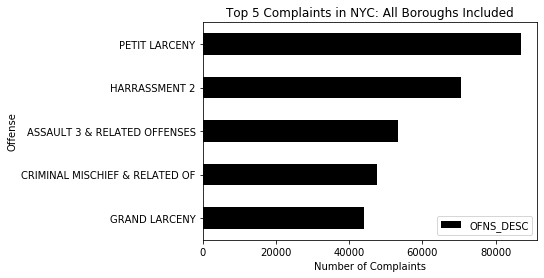

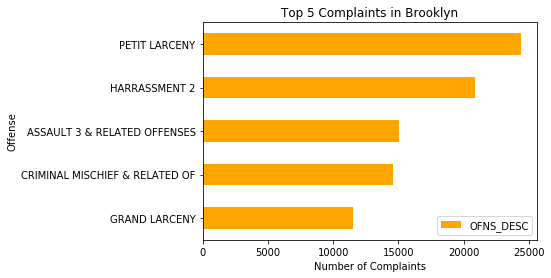

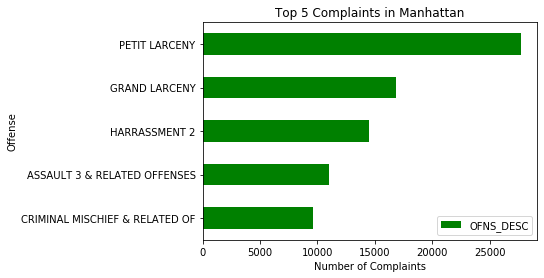

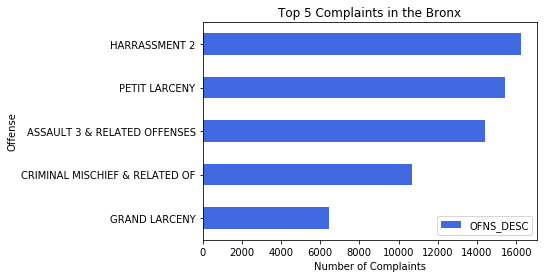

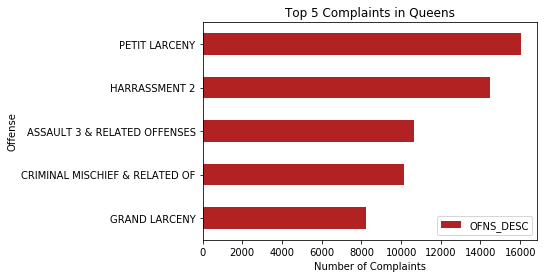

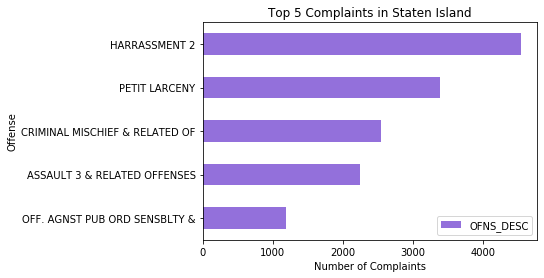

In [83]:
nypd_all_boro.sort_values(by='OFNS_DESC', ascending=True).plot(kind='barh', color='black')
plt.ylabel('Offense')
plt.xlabel('Number of Complaints')
plt.title('Top 5 Complaints in NYC: All Boroughs Included');

nypd_brooklyn.sort_values(by='OFNS_DESC', ascending=True).plot(kind='barh', color='orange')
plt.ylabel('Offense')
plt.xlabel('Number of Complaints')
plt.title('Top 5 Complaints in Brooklyn');

nypd_manhattan.sort_values(by='OFNS_DESC', ascending=True).plot(kind='barh', color='green')
plt.ylabel('Offense')
plt.xlabel('Number of Complaints')
plt.title('Top 5 Complaints in Manhattan');

nypd_bronx.sort_values(by='OFNS_DESC', ascending=True).plot(kind='barh', color='royalblue')
plt.ylabel('Offense')
plt.xlabel('Number of Complaints')
plt.title('Top 5 Complaints in the Bronx');

nypd_queens.sort_values(by='OFNS_DESC', ascending=True).plot(kind='barh', color='firebrick')
plt.ylabel('Offense')
plt.xlabel('Number of Complaints')
plt.title('Top 5 Complaints in Queens');

nypd_staten_island.sort_values(by='OFNS_DESC', ascending=True).plot(kind='barh', color='mediumpurple')
plt.ylabel('Offense')
plt.xlabel('Number of Complaints')
plt.title('Top 5 Complaints in Staten Island');

### Observation #4:
### Top 5 complaints of each borough is fairly similar across the boroughs, with some slight differences in ranking. Staten Island with an outlier: Offenses Against Public Order, Public Sensibilities and the Right to Privacy - ranking as the 5th most popular complaint.

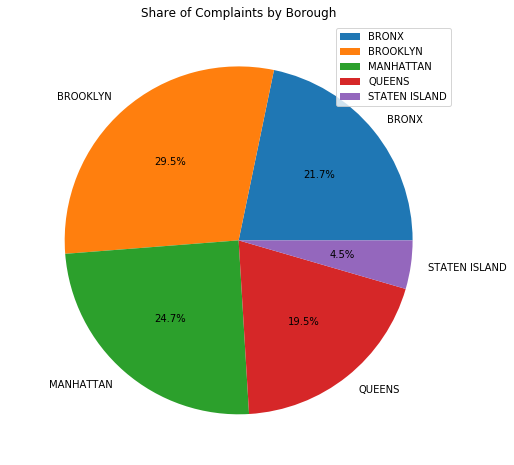

In [84]:
nypd_boro_known.groupby(['BORO_NM']).count().plot(kind='pie', y='CMPLNT_NUM', figsize=(8,8), autopct='%1.1f%%')
plt.ylabel(' ')
plt.title('Share of Complaints by Borough');

In [85]:
boro_cmplnt = pd.DataFrame(nypd_boro_known['BORO_NM'].value_counts().sort_index())
boro_cmplnt.rename(columns = {'BORO_NM': 'VOL_CMPLNTS'}, inplace=True)

In [86]:
boro_cmplnt.at['BRONX', 'POPULATION'] = 1432132
boro_cmplnt.at['BROOKLYN', 'POPULATION'] = 2582830
boro_cmplnt.at['MANHATTAN', 'POPULATION'] = 1628701
boro_cmplnt.at['QUEENS', 'POPULATION'] = 2278906
boro_cmplnt.at['STATEN ISLAND', 'POPULATION'] = 476179
boro_cmplnt['POPULATION'] = boro_cmplnt['POPULATION'].astype(int)

In [87]:
boro_cmplnt['CMPLNTS_PER_CAPITA'] = boro_cmplnt['VOL_CMPLNTS'] / boro_cmplnt['POPULATION']
boro_cmplnt = boro_cmplnt.sort_values(by='CMPLNTS_PER_CAPITA', ascending=False)
boro_cmplnt

,VOL_CMPLNTS,POPULATION,CMPLNTS_PER_CAPITA
BRONX,101314,1432132,0.070743
MANHATTAN,115188,1628701,0.070724
BROOKLYN,137422,2582830,0.053206
STATEN ISLAND,20990,476179,0.044080
QUEENS,91055,2278906,0.039956


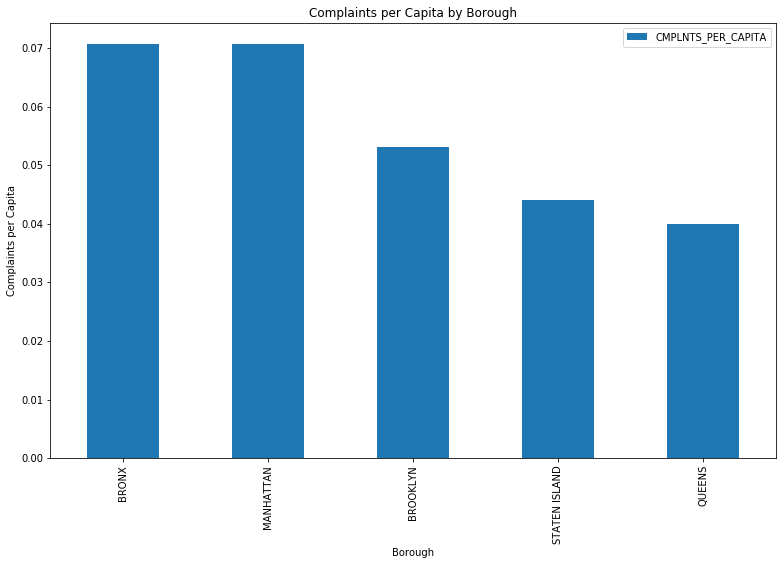

In [92]:
boro_cmplnt.plot(kind='bar', y='CMPLNTS_PER_CAPITA', figsize=(13,8))
plt.ylabel('Complaints per Capita')
plt.xlabel('Borough')
plt.title('Complaints per Capita by Borough');

### Observation #5:
### Brooklyn takes top borough for share of complaints across NYC. However, when factoring for population, the Bronx has the most number of complaints per capita (by head), with Manhattan trailing not too far behind.

### Demographic makeup

In [89]:
susp_demo = nypd[(nypd['SUSP_SEX'] != 'U') & \
                 (nypd['SUSP_AGE_GROUP'] != 'UNKNOWN')].copy()

In [90]:
susp_grouped_demo = susp_demo.groupby(['SUSP_SEX', \
                                       'SUSP_AGE_GROUP']). \
                                        CMPLNT_NUM.count()

susp_grouped_demo = susp_grouped_demo.unstack()
susp_grouped_demo

SUSP_AGE_GROUP,18-24,25-44,45-64,65+,<18
SUSP_SEX,,,,,
F,10206,26468,9822,1031,3626
M,31056,88836,33972,2846,8456


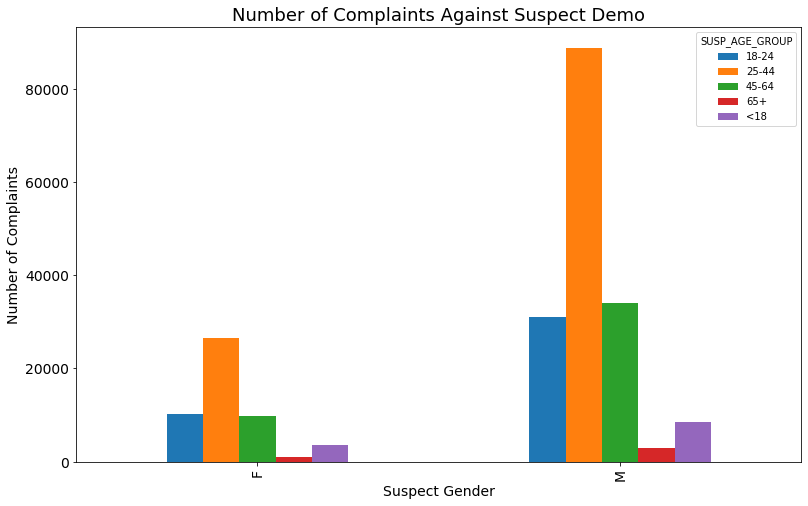

In [104]:
susp_grouped_demo.plot(kind='bar', fontsize=14, figsize=(13,8))
plt.ylabel('Number of Complaints', fontsize=14)
plt.xlabel('Suspect Gender', fontsize=14)
plt.title('Number of Complaints Against Suspect Demo', fontsize=18);

## Observation #6:
## Studies** have shown that "Crime occurs most frequently during the second and third decades of life. Males commit more crime overall and more violent crime than females." 2018 crime data from the NYPD shows the top suspect demos are:
#### 1. Male, 25-44
#### 2. Male, 45-64
#### 3. Male, 18-24
#### 4. Female, 25-44
#### 5. Female, 18-24

## NYPD 2018 crime data is in-line with these studies.

** https://en.wikipedia.org/wiki/Statistical_correlations_of_criminal_behaviour#Gender_and_biology